
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [7]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [2]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

In [4]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [102]:
#knn
X = ha.drop(columns=["cp_is_2", "cp", "cp_is_3","cp_is_1", "cp_is_0"])
y = ha["cp"]

knn_pipeline = Pipeline([
    ("ct", ct),
    ("knn", KNeighborsClassifier())
])

knn_pipeline.fit(X,y)
scores1 = cross_val_score(knn_pipeline, X, y, cv=5, scoring="roc_auc_ovr").mean()
print(f"roc auc Score: {scores1}")

#decision
dt_pipeline=Pipeline([
    ("ct", ct),
    ("dt", DecisionTreeClassifier(max_depth=3))
])


dt_pipeline.fit(X,y)
scores2= cross_val_score(dt_pipeline, X, y, cv=5, scoring="roc_auc_ovr").mean()
print(f"roc auc Score: {scores2}")

#lda
lda_pipeline=Pipeline([
    ("ct", ct),
    ("lda", LinearDiscriminantAnalysis())
])

lda_pipeline.fit(X,y)
scores3= cross_val_score(lda_pipeline, X, y, cv=5, scoring="roc_auc_ovr").mean()
print(f"roc auc Score: {scores3}")

roc auc Score: 0.5962262199130134
roc auc Score: 0.6543471001430293
roc auc Score: 0.7057410454407037


In [ ]:
ccp_alpha
is the best for the decision tree


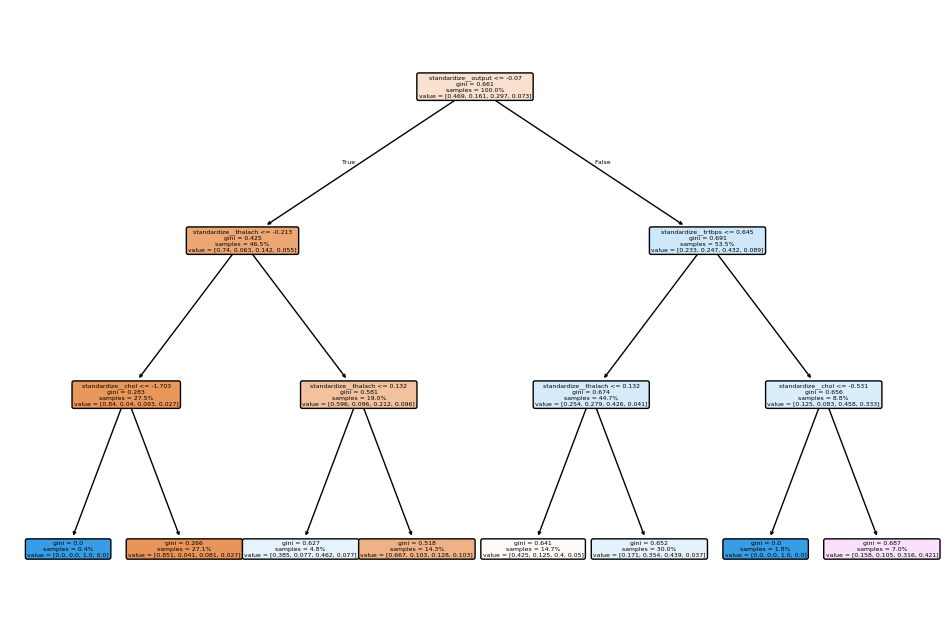

In [103]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

decision_tree = dt_pipeline.named_steps["dt"]
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=ct.get_feature_names_out(), rounded=True, proportion=True)
plt.show()

THe most important variables is output, trtbps, thalach, and gini

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [51]:
ha["cp_is_3"] = np.where(ha["cp"] == 3, 1, 0)

X2= ha.drop(columns=["cp_is_2", "cp", "cp_is_3","cp_is_1", "cp_is_0"])
y2= ha["cp_is_3"]

logreg_pipeline=Pipeline([
    ("ct", ct),
    ("logreg", LogisticRegression(max_iter=1000))  # Logistic Regression with increased iterations for convergence
])

logfit= logreg_pipeline.fit(X,y)
scores= cross_val_score(logreg_pipeline, X2, y2, cv=5, scoring="f1").mean()
print(f"F1 Score 3: {scores}")


F1 Score 3: 0.0


In [50]:
ha["cp_is_2"] = np.where(ha["cp"] == 2, 1, 0)

X1= ha.drop(columns=["cp_is_2", "cp", "cp_is_3","cp_is_1", "cp_is_0"])
y1= ha["cp_is_2"]

logreg_pipeline=Pipeline([
    ("ct", ct),
    ("logreg", LogisticRegression(max_iter=1000))  # Logistic Regression with increased iterations for convergence
])

logfit= logreg_pipeline.fit(X,y)
scores= cross_val_score(logreg_pipeline, X1, y1, cv=5, scoring="f1").mean()
print(f"F1 Score 2: {scores}")

F1 Score 2: 0.1393939393939394


In [49]:
ha["cp_is_1"] = np.where(ha["cp"] == 1, 1, 0)

X3= ha.drop(columns=["cp_is_2", "cp", "cp_is_3","cp_is_1", "cp_is_0"])
y3= ha["cp_is_1"]

logreg_pipeline=Pipeline([
    ("ct", ct),
    ("logreg", LogisticRegression(max_iter=1000))  # Logistic Regression with increased iterations for convergence
])

logfit= logreg_pipeline.fit(X,y)
scores= cross_val_score(logreg_pipeline, X3, y3, cv=5, scoring="f1").mean()
print(f"F1 Score 1: {scores}")

F1 Score 1: 0.0


In [99]:
ha["cp_is_0"] = np.where(ha["cp"] == 0, 1, 0)

X3= ha.drop(columns=["cp_is_2", "cp", "cp_is_3","cp_is_1", "cp_is_0"])
y3= ha["cp_is_0"]

logreg_pipeline=Pipeline([
    ("ct", ct),
    ("logreg", LogisticRegression(max_iter=1000))
])

logfit= logreg_pipeline.fit(X,y)
scores= cross_val_score(logreg_pipeline, X3, y3, cv=5, scoring="f1").mean()
print(f"F1 Score 1: {scores}")

F1 Score 1: 0.6525962644949986


## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [97]:
ha1= ha[(ha["cp"]==0)|(ha["cp"]==1)]

X4=ha1.drop(columns=["cp_is_2", "cp", "cp_is_3","cp_is_1", "cp_is_0"])
y4=ha1["cp"]

logreg_pipeline=Pipeline([
    ("ct", ct),
    ("logreg", LogisticRegression(max_iter=1000))
])

logfit= logreg_pipeline.fit(X,y)
scores= cross_val_score(logreg_pipeline, X4, y4, cv=5, scoring="roc_auc").mean()
print(f"roc auc: {scores}")

roc auc: 0.8376709401709401


In [94]:
ha2= ha[(ha["cp"]==0)|(ha["cp"]==2)]

X5=ha2.drop(columns=["cp_is_2", "cp", "cp_is_3","cp_is_1", "cp_is_0"])
y5=ha2["cp"]

logreg_pipeline=Pipeline([
    ("ct", ct),
    ("logreg", LogisticRegression(max_iter=1000))
])

logfit= logreg_pipeline.fit(X,y)
scores= cross_val_score(logreg_pipeline, X5, y5, cv=5, scoring="roc_auc").mean()
print(f"roc auc: {scores}")

roc auc: 0.7511029411764706


In [95]:
ha3= ha[(ha["cp"]==0)|(ha["cp"]==3)]

X6=ha3.drop(columns=["cp_is_2", "cp", "cp_is_3","cp_is_1", "cp_is_0"])
y6=ha3["cp"]

logreg_pipeline=Pipeline([
    ("ct", ct),
    ("logreg", LogisticRegression(max_iter=1000))
])

logfit= logreg_pipeline.fit(X,y)
scores= cross_val_score(logreg_pipeline, X6, y6, cv=5, scoring="roc_auc").mean()
print(f"roc auc: {scores}")

roc auc: 0.7412307692307692
